<a href="https://colab.research.google.com/github/andrea02polimi/RL-projects/blob/main/01_getting_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started

This notebook is inspired to the Stable Baselines3 tutorial available at [https://github.com/araffin/rl-tutorial-jnrr19](https://github.com/araffin/rl-tutorial-jnrr19).


## Introduction

In this notebook, we will learn how to use **Gymnasium** environments and the basics of **Stable Baselines3**: how to instance an RL algorithm, train and evaluate it.

### Links

Gymnasium Github: [https://github.com/Farama-Foundation/Gymnasium](https://github.com/Farama-Foundation/Gymnasium)

Gymnasium Documentation: [https://gymnasium.farama.org/index.html](https://gymnasium.farama.org/index.html#)

Stable Baselines 3 Github:[https://github.com/DLR-RM/stable-baselines3](https://github.com/DLR-RM/stable-baselines3)

Stable Baseline 3 Documentation: [https://stable-baselines3.readthedocs.io/en/master/](https://stable-baselines3.readthedocs.io/en/master/)

## Install Gymnasium and Stable Baselines3 Using Pip

In [ ]:
!pip install gymnasium
!pip install renderlab  #For rendering
!pip install stable-baselines3[extra]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 13.9 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym
import renderlab
import stable_baselines3

print(gym.__version__)
print(stable_baselines3.__version__)

/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)
  if event.key is 'enter':

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the aut

1.2.1
2.7.0


## Initializing Environments

Initializing environments in Gym and is done as follows. We can find a list of available environment [here](https://gym.openai.com/envs/#classic_control).

In [ ]:
env = gym.make('CartPole-v1')

env_eval = gym.make('CartPole-v1', render_mode = "rgb_array")
env_eval = renderlab.RenderFrame(env_eval, "./output")

"A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. "

Cartpole Environment Decription: [https://gymnasium.farama.org/environments/classic_control/cart_pole/](https://gymnasium.farama.org/environments/classic_control/cart_pole/)

Cartpole Source Code: [https://github.com/Farama-Foundation/Gymnasium/blob/main/gymnasium/envs/classic_control/cartpole.py](https://github.com/Farama-Foundation/Gymnasium/blob/main/gymnasium/envs/classic_control/cartpole.py)

![Cartpole](https://cdn-images-1.medium.com/max/1143/1*h4WTQNVIsvMXJTCpXm_TAw.gif)

## Interacting with the Environment

We run an instance of `CartPole-v1` environment for 30 timesteps, showing the information returned by the environment.

In [ ]:
state, _ = env.reset() # resets the environment in the initial state
print("Initial state: ", state)

for _ in range(30):
    action = env.action_space.sample() # sample a random action

    state, reward, terminated, truncated, _ = env.step(action)  # execute the action in the environment
    print("State:", state,
          "Action:", action,
          "Reward:", reward,
          "Terminated:", terminated,
          "Truncated:", truncated)

env.close()

  logger.warn(



Initial state:  [ 0.03106498 -0.01934686 -0.03781283 -0.00736524]
State: [ 0.03067805 -0.2139067  -0.03796013  0.27315158] Action: 0 Reward: 1.0 Terminated: False Truncated: False
State: [ 0.02639991 -0.01826425 -0.0324971  -0.03125829] Action: 1 Reward: 1.0 Terminated: False Truncated: False
State: [ 0.02603463 -0.21290547 -0.03312226  0.25099692] Action: 0 Reward: 1.0 Terminated: False Truncated: False
State: [ 0.02177652 -0.01732657 -0.02810233 -0.05194668] Action: 1 Reward: 1.0 Terminated: False Truncated: False
State: [ 0.02142999 -0.21203452 -0.02914126  0.23173895] Action: 0 Reward: 1.0 Terminated: False Truncated: False
State: [ 0.0171893  -0.4067282  -0.02450648  0.51508915] Action: 0 Reward: 1.0 Terminated: False Truncated: False
State: [ 0.00905473 -0.60149664 -0.0142047   0.7999499 ] Action: 0 Reward: 1.0 Terminated: False Truncated: False
State: [-0.0029752  -0.40618277  0.0017943   0.5028326 ] Action: 1 Reward: 1.0 Terminated: False Truncated: False
State: [-0.01109886 -0

A Gymnasium environment provides to the user mainly four methods:

* `reset()`: resets the environment to its initial state $S_0 \sim d_0$ and returns the observation corresponding to the initial state.


* `step(action)`: takes an action $A_t$ as an input and executes the action in current state $S_t$ of the environment. This method returns a tuple of four values:

    * `observation` (object): an environment-specific object representation of your observation of the environment after the action is executed. It corresponds to the observation of the next state $S_{t+1} \sim p(\cdot|S_t,A_t)$
    
    * `reward` (float): immediate reward $R_{t+1} = r(S_t,A_t)$ obtained by executing action $A_t$ in state $S_t$
    
    * `terminated`(boolean): whether the reached next state $S_{t+1}$ is a terminal state.
    
    * `truncated`(boolean): whether the trajectory has reached the maximum number of steps.**testo in grassetto**
    
    * `info` (dict): additional information useful for debugging and environment-specific.
    
    
*  `render(method='human')`: allows visualizing the agent in action. Note that graphical interface does not work on Google Colab, so we cannot use it directly (we will need a workaround).


*  `seed()`: sets the seed for this environment’s random number generator.

## Observation and Action Spaces

*  `observation_space`: this attribute provides the format of valid observations $\mathcal{S}$. It is of datatype `Space` provided by Gymnasium. For example, if the observation space is of type `Box` and the shape of the object is `(4,)`, this denotes a valid observation will be an array of 4 numbers.

*  `action_space`: this attribute provides the format of valid actions $\mathcal{A}$. It is of datatype `Space` provided by Gymnasium. For example, if the action space is of type `Discrete` and gives the value `Discrete(2)`, this means there are two valid discrete actions: 0 and 1.

In [ ]:
print(env.observation_space)

print(env.action_space)

print(env.observation_space.high)

print(env.observation_space.low)

Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Discrete(2)
[4.8               inf 0.41887903        inf]
[-4.8               -inf -0.41887903        -inf]


`Spaces` types available in Gymnasium:

*  `Box`: an $n$-dimensional compact space (i.e., a compact subset of $\mathbb{R}^n$). The bounds of the space are contained in the `high` and `low` attributes.


*  `Discrete`: a discrete space made of $n$ elements, where $\{0,1,\dots,n-1\}$ are the possible values.


Other `Spaces` types can be used: `Dict`, `Tuple`, `MultiBinary`, `MultiDiscrete`.

In [ ]:
import numpy as np
from gymnasium.spaces import Box, Discrete

observation_space = Box(low=-1.0, high=2.0, shape=(3,), dtype=np.float32)
print(observation_space.sample())

observation_space = Discrete(4)
print(observation_space.sample())

[0.70571136 1.8420582  0.3488891 ]
0


## Details on the Cartpole Environment

From [https://github.com/Farama-Foundation/Gymnasium/blob/main/gymnasium/envs/classic_control/cartpole.py](https://github.com/Farama-Foundation/Gymnasium/blob/main/gymnasium/envs/classic_control/cartpole.py)

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum starts upright, and the goal is to prevent it from falling over by increasing and reducing the cart's velocity.

### Action Space
The action space is `action` in $\{0,1\}$, where `action` is used to push the cart with a fixed amount of force:

| Num | Action                 |
|-----|------------------------|
| 0   | Push cart to the left  |
| 1   | Push cart to the right |
    
Note: The amount the velocity is reduced or increased is not fixed as it depends on the angle the pole is pointing. This is because the center of gravity of the pole increases the amount of energy needed to move the cart underneath it.
    
### Observation Space
The observation is a `ndarray` with shape `(4,)` where the elements correspond to the following:

| Num | Observation           | Min                  | Max                |
|-----|-----------------------|----------------------|--------------------|
| 0   | Cart Position         | -4.8*                | 4.8*                |
| 1   | Cart Velocity         | -Inf                 | Inf                |
| 2   | Pole Angle            | ~ -0.418 rad (-24°)**| ~ 0.418 rad (24°)** |
| 3   | Pole Angular Velocity | -Inf                 | Inf                |

**Note:** above denotes the ranges of possible observations for each element, but in two cases this range exceeds the range of possible values in an un-terminated episode:
- `*`: the cart x-position can be observed between `(-4.8, 4.8)`, but an episode terminates if the cart leaves the `(-2.4, 2.4)` range.
- `**`: Similarly, the pole angle can be observed between  `(-.418, .418)` radians or precisely **±24°**, but an episode is  terminated if the pole angle is outside the `(-.2095, .2095)` range or precisely **±12°**
    
### Rewards
Reward is 1 for every step taken, including the termination step.

### Starting State
All observations are assigned a uniform random value between (-0.05, 0.05)

### Episode Termination
The episode terminates of one of the following occurs:
1. Pole Angle is more than ±12°
2. Cart Position is more than ±2.4 (center of the cart reaches the edge of the display)
3. Episode length is greater than 500


## Evaluation of some Simple Policies

We now evaluate some policies on the cartpole.

* **Uniform Policy**: uniformly random policy

$$
\pi(a|s) = \mathrm{Uni}(\{0,1\})
$$

* **Reactive Policy**: simple deterministic policy that selects the action based on the pole angle

$$
\pi(s) = \begin{cases}
                0 & \text{if Pole Angle } \le 0 \\
                1 & \text{otherwise}
            \end{cases}
$$

In [ ]:
class UniformPolicy:

    def predict(self, obs):
        return np.random.randint(0, 2), obs  # return the observation to comply with stable-baselines3


class ReactivePolicy:

    def predict(self, obs):
        if obs[2] <= 0:
            return 0, obs
        else:
            return 1, obs

Let us create a function to evaluate the agent's performance.

In [ ]:
def evaluate(env, policy, gamma=1., num_episodes=100):
    """
    Evaluate a RL agent
    :param env: (Env object) the Gym environment
    :param policy: (BasePolicy object) the policy in stable_baselines3
    :param gamma: (float) the discount factor
    :param num_episodes: (int) number of episodes to evaluate it
    :return: (float) Mean reward for the last num_episodes
    """
    all_episode_rewards = []
    for i in range(num_episodes): # iterate over the episodes
        episode_rewards = []
        done = False
        discounter = 1.
        obs, _ = env.reset()
        while not done: # iterate over the steps until termination
            action, _ = policy.predict(obs)
            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            episode_rewards.append(reward * discounter) # compute discounted reward
            discounter *= gamma

        all_episode_rewards.append(sum(episode_rewards))

    mean_episode_reward = np.mean(all_episode_rewards)
    std_episode_reward = np.std(all_episode_rewards) / np.sqrt(num_episodes - 1)
    print("Mean reward:", mean_episode_reward,
          "Std reward:", std_episode_reward,
          "Num episodes:", num_episodes)

    return mean_episode_reward, std_episode_reward

Let us test the uniform policy.

In [ ]:
uniform_policy = UniformPolicy()

uniform_policy_mean, uniform_policy_std = evaluate(env, uniform_policy)

_, _ = evaluate(env_eval, uniform_policy, num_episodes=1)
env_eval.play()

Mean reward: 21.81 Std reward: 1.2331035822040435 Num episodes: 100


  std_episode_reward = np.std(all_episode_rewards) / np.sqrt(num_episodes - 1)



Mean reward: 14.0 Std reward: nan Num episodes: 1
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Let us test the reactive policy.

In [ ]:
reactive_policy = ReactivePolicy()

reactive_policy_mean, reactive_policy_std = evaluate(env, reactive_policy)

_, _ = evaluate(env_eval, reactive_policy, num_episodes=1)
env_eval.play()

  std_episode_reward = np.std(all_episode_rewards) / np.sqrt(num_episodes - 1)



Mean reward: 43.64 Std reward: 0.9330648964622456 Num episodes: 100
Mean reward: 34.0 Std reward: nan Num episodes: 1
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



t:   0%|          | 0/36 [00:00<?, ?it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./output/1760597263.1913602.mp4, 720000 bytes wanted but 0 bytes read,at frame 35/36, at time 1.17/1.17 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


## PPO Training

We now use Stable Baselines3 to train some simple algorithms. We start by using [Proximal Policy Optimization](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html).

We select the [MlpPolicy](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#ppo-policies) because the state of the CartPole environment is a feature vector (not images for instance). The type of action to use (discrete/continuous) will be automatically deduced from the environment action space.

We consider two network architectures:

* Linear policy
* Two hidden layers of 32 neurons each

In [ ]:
from stable_baselines3 import PPO

# Instantiate the algorithm with 32x32 NN approximator for both actor and critic
ppo_mlp = PPO("MlpPolicy", env, verbose=1,
                learning_rate=0.01,
                policy_kwargs=dict(net_arch = [dict(pi=[32, 32], vf=[32, 32])]))

print(ppo_mlp.policy)

# Instantiate the algorithm with linear approximator for both actor and critic
ppo_linear = PPO("MlpPolicy", env, verbose=1,
                   learning_rate=0.01,
                   policy_kwargs=dict(net_arch = [dict(pi=[], vf=[])]))

print(ppo_linear.policy)

  warnings.warn(



Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


  return datetime.utcnow().replace(tzinfo=utc)

  warnings.warn(

  warnings.warn(



ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=4, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=4, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=32, out_features=2, bias=True)
  (value_net): Linear(in_features=32, out_features=1, bias=True)
)
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
ActorCriticPolicy(
  (features_extracto

Let us now train the algorithms. In order to keep track of the performance during learning, we can log the evaluations.

In [ ]:
# Train the agent for 50000 steps
ppo_mlp.learn(total_timesteps=50000, log_interval=4, progress_bar=True)

ppo_linear.learn(total_timesteps=50000, log_interval=4, progress_bar=True)

Output()

  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):



-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 63.1        |
|    ep_rew_mean          | 63.1        |
| time/                   |             |
|    fps                  | 428         |
|    iterations           | 4           |
|    time_elapsed         | 19          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.023866106 |
|    clip_fraction        | 0.231       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.579      |
|    explained_variance   | 0.418       |
|    learning_rate        | 0.01        |
|    loss                 | 22.1        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0258     |
|    value_loss           | 36.3        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 132   

Output()

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 46.8        |
|    ep_rew_mean          | 46.8        |
| time/                   |             |
|    fps                  | 570         |
|    iterations           | 4           |
|    time_elapsed         | 14          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.005344673 |
|    clip_fraction        | 0.0383      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.649      |
|    explained_variance   | -0.00783    |
|    learning_rate        | 0.01        |
|    loss                 | 38.2        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0103     |
|    value_loss           | 89.5        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 106   

In [ ]:
# Evaluate the trained models
ppo_mlp_mean, ppo_mlp_std = evaluate(env, ppo_mlp)

_, _ = evaluate(env_eval, ppo_mlp, num_episodes=1)
env_eval.play()


ppo_linear_mean, ppo_linear_std = evaluate(env, ppo_linear)

_, _ = evaluate(env_eval, ppo_linear, num_episodes=1)
env_eval.play()

Mean reward: 500.0 Std reward: 0.0 Num episodes: 100


  std_episode_reward = np.std(all_episode_rewards) / np.sqrt(num_episodes - 1)



Mean reward: 500.0 Std reward: nan Num episodes: 1
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Mean reward: 229.51 Std reward: 8.211023570835007 Num episodes: 100
Mean reward: 270.0 Std reward: nan Num episodes: 1
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Let us have a look at the weights learned by PPO with the linear policy. Since actions are discrete, the policy model is **softmax**:

$$
\pi_{\boldsymbol{\theta}}(a|\mathbf{s}) \propto \exp \left( \mathbf{s}^T \boldsymbol{\theta}(a) + b(a) \right)
$$

In [ ]:
print(ppo_linear.policy.action_net.weight)
print(ppo_linear.policy.action_net.bias)

Parameter containing:
tensor([[ 0.4591, -0.0544, -6.3173, -1.3962],
        [-0.4458,  0.0586,  6.3171,  1.3989]], device='cuda:0',
       requires_grad=True)
Parameter containing:
tensor([-0.0034,  0.0034], device='cuda:0', requires_grad=True)


## DQN Training

Let us now try [DQN](https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html) with an MlpPolicy as well.

In [ ]:
from stable_baselines3 import DQN
from torch import nn


# Instantiate the algorithm with 32x32 NN approximator
dqn_mlp = DQN("MlpPolicy", env, verbose=1,
                learning_starts=3000,
                policy_kwargs=dict(net_arch = [32, 32], activation_fn=nn.Tanh))

print(dqn_mlp.policy)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
DQNPolicy(
  (q_net): QNetwork(
    (features_extractor): FlattenExtractor(
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (q_net): Sequential(
      (0): Linear(in_features=4, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): Tanh()
      (4): Linear(in_features=32, out_features=2, bias=True)
    )
  )
  (q_net_target): QNetwork(
    (features_extractor): FlattenExtractor(
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (q_net): Sequential(
      (0): Linear(in_features=4, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): Tanh()
      (4): Linear(in_features=32, out_features=2, bias=True)
    )
  )
)


In [ ]:
# Train the agent for 50000 steps
dqn_mlp.learn(total_timesteps=50000, log_interval=100, progress_bar=True)

Output()

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 21.8     |
|    exploration_rate | 0.586    |
| time/               |          |
|    episodes         | 100      |
|    fps              | 9746     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2179     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.3     |
|    ep_rew_mean      | 16.3     |
|    exploration_rate | 0.277    |
| time/               |          |
|    episodes         | 200      |
|    fps              | 3153     |
|    time_elapsed     | 1        |
|    total_timesteps  | 3805     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.219    |
|    n_updates        | 201      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean    

In [ ]:
# Evaluate the trained models
dqn_mlp_mean, dqn_mlp_std = evaluate(env, dqn_mlp)

_, _ = evaluate(env_eval, dqn_mlp, num_episodes=1)
env_eval.play()

Mean reward: 71.9 Std reward: 0.6690110294873751 Num episodes: 100


  std_episode_reward = np.std(all_episode_rewards) / np.sqrt(num_episodes - 1)



Mean reward: 71.0 Std reward: nan Num episodes: 1
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Let us now plot the final results.

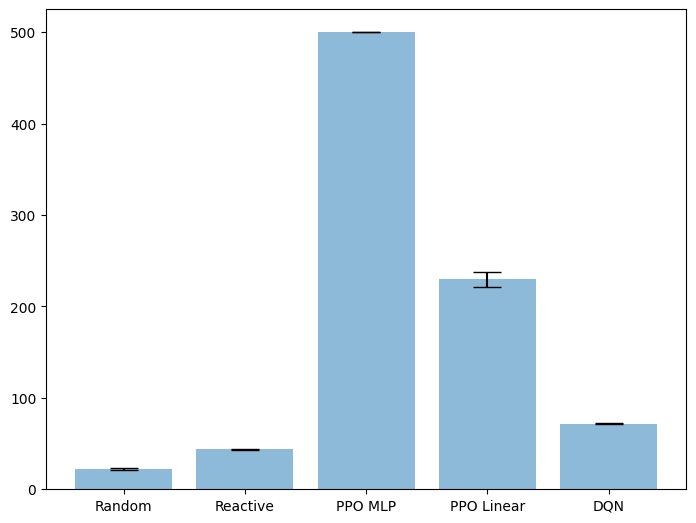

In [ ]:
import matplotlib.pyplot as plt

#Plot the results
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

algs = ['Random', 'Reactive', 'PPO MLP', 'PPO Linear', 'DQN']
means = [uniform_policy_mean, reactive_policy_mean, ppo_mlp_mean, ppo_linear_mean, dqn_mlp_mean]
errors = [uniform_policy_std, reactive_policy_std, ppo_mlp_std, ppo_linear_std, dqn_mlp_std]

ax.bar(algs, means, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.show()